# Introduction to Deep Learning 
# Project 6
This notebook illustrates the influence of activations hyperparameters such as RELU, tanh and sigmoid on the performance of convolutional neural networks.



First we start using RELU that is the one mostly used.

#ReLU



In [0]:
!pip install pillow==5.4.1
!pip install matplotlib
!pip install scikit-learn
!pip install torch
!pip install torchvision

In [0]:
import matplotlib.pyplot as plt
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
def train(log_interval, model, device, train_loader, optimizer, epoch):
    losses = []
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    return losses

In [0]:
def validate(model, device, loader):
    
    model.eval()  # let's put the model in evaluation mode

    validation_loss = 0
    correct = 0
    
    with torch.no_grad():  # we don't need gradient computation at all
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            validation_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    validation_loss /= len(loader.dataset)

    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        validation_loss, correct, len(loader.dataset),
        100. * correct / len(loader.dataset)))
    
    return validation_loss

In [0]:
train_batch_size = 128

mnist_mean = 0.1307
mnist_stddev = 0.3081
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data',
                   train=True,
                   download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((mnist_mean,), (mnist_stddev,))
                   ])),
    batch_size=train_batch_size,
    shuffle=True)

valid_batch_size = 1000
valid_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data',
                   train=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((mnist_mean,), (mnist_stddev,))
                   ])),
    batch_size=valid_batch_size,
    shuffle=True)

In [0]:
def interation():
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = Net().to(device)
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

  train_losses = []
  valid_losses = []
  valid_x = []
  num_epochs = 10
  for epoch in range(1, num_epochs + 1):
      epoch_losses = train(80, model, device, train_loader, optimizer, epoch)
      train_losses.extend(epoch_losses)
      valid_loss = validate(model, device, valid_loader)
      valid_losses.append([valid_loss])
      valid_x.append(len(train_losses) - 1)

  plt.gcf().clear()
  plt.plot(train_losses, 'b-')
  plt.plot(valid_x, valid_losses, 'r-')
  plt.show()

Firstly, we keep the code as the original one.

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.315674
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.610389
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.266129
Train Epoch: 1 [30720/60000 (51%)]	Loss: 0.312820
Train Epoch: 1 [40960/60000 (68%)]	Loss: 0.240668
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.262725

Validation set: Average loss: 0.1589, Accuracy: 9540/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.176403
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.156653
Train Epoch: 2 [20480/60000 (34%)]	Loss: 0.118064
Train Epoch: 2 [30720/60000 (51%)]	Loss: 0.098058
Train Epoch: 2 [40960/60000 (68%)]	Loss: 0.075628
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.068193

Validation set: Average loss: 0.1015, Accuracy: 9683/10000 (97%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.129884
Train Epoch: 3 [10240/60000 (17%)]	Loss: 0.063415
Train Epoch: 3 [20480/60000 (34%)]	Loss: 0.113627
Train Epoch: 3 [30720/60000 (51%)]	Loss: 0.060465
Train Epoch: 3 [40960/60000 (68%)]	Loss: 0.150884
Train Epoch: 3 [51200/60000 (85

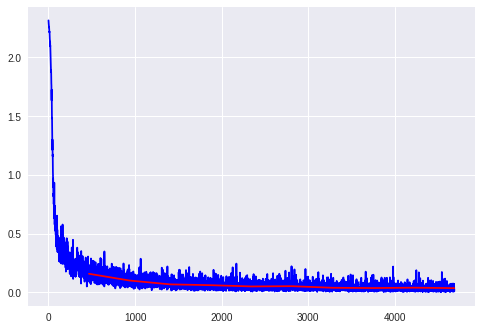

In [0]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

interation()

#SIGMOID
Now we'll use the sigmoid function instead of the ReLU

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.316687
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.298605
Train Epoch: 1 [20480/60000 (34%)]	Loss: 2.306064
Train Epoch: 1 [30720/60000 (51%)]	Loss: 2.286284
Train Epoch: 1 [40960/60000 (68%)]	Loss: 2.330697
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.295166

Validation set: Average loss: 2.3043, Accuracy: 1135/10000 (11%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.312109
Train Epoch: 2 [10240/60000 (17%)]	Loss: 2.314559
Train Epoch: 2 [20480/60000 (34%)]	Loss: 2.314693
Train Epoch: 2 [30720/60000 (51%)]	Loss: 2.302809
Train Epoch: 2 [40960/60000 (68%)]	Loss: 2.310541
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.305312

Validation set: Average loss: 2.2999, Accuracy: 1135/10000 (11%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.297501
Train Epoch: 3 [10240/60000 (17%)]	Loss: 2.307345
Train Epoch: 3 [20480/60000 (34%)]	Loss: 2.291492
Train Epoch: 3 [30720/60000 (51%)]	Loss: 2.302285
Train Epoch: 3 [40960/60000 (68%)]	Loss: 2.290897
Train Epoch: 3 [51200/60000 (85

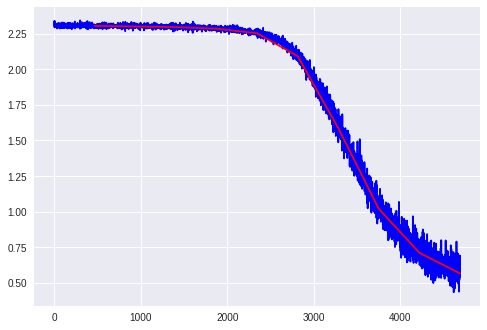

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = torch.sigmoid(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = torch.sigmoid(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

interation()


#TANH
Finally we initialize the activation function as the tanh

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.295368
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.018193
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.607228
Train Epoch: 1 [30720/60000 (51%)]	Loss: 0.407750
Train Epoch: 1 [40960/60000 (68%)]	Loss: 0.467225
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.363601

Validation set: Average loss: 0.2892, Accuracy: 9191/10000 (92%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.389579
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.239416
Train Epoch: 2 [20480/60000 (34%)]	Loss: 0.216983
Train Epoch: 2 [30720/60000 (51%)]	Loss: 0.204278
Train Epoch: 2 [40960/60000 (68%)]	Loss: 0.279568
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.183474

Validation set: Average loss: 0.1795, Accuracy: 9475/10000 (95%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.146176
Train Epoch: 3 [10240/60000 (17%)]	Loss: 0.225116
Train Epoch: 3 [20480/60000 (34%)]	Loss: 0.150327
Train Epoch: 3 [30720/60000 (51%)]	Loss: 0.149964
Train Epoch: 3 [40960/60000 (68%)]	Loss: 0.193506
Train Epoch: 3 [51200/60000 (85

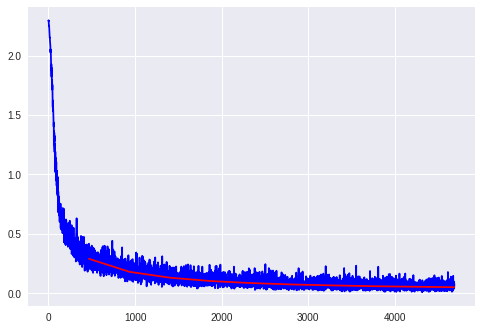

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = torch.tanh(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = torch.tanh(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

interation()

We have done a power point to explain better our results:
https://docs.google.com/presentation/d/11M8JNpGA1VUtPTzTEUFSUCbYJ_OOxxYuhr3MfnLZEV0/edit?usp=sharing